<a href="https://colab.research.google.com/github/shitodcy/tugas-AI-face-recognition/blob/main/Tugas_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install kaggle

In [26]:
from google.colab import files
print("upload file json")
files.upload()

upload file json


KeyboardInterrupt: 

In [24]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
print("\nMengunduh dataset...")
!kaggle datasets download -d cashutosh/gender-classification-dataset
!unzip -q gender-classification-dataset.zip
print("Dataset siap digunakan.")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Direktori data
train_dir = 'Training'
validation_dir = 'Validation'

# Membuat generator data untuk memuat dan memproses gambar secara otomatis
# Ini akan melakukan normalisasi (rescale=1./255) dan augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Normalisasi piksel
    rotation_range=20,   # Augmentasi: memutar gambar
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255) # Cukup normalisasi untuk data validasi

# Menyiapkan batch data dari direktori
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(96, 96),  # Mengubah ukuran semua gambar menjadi 96x96
    batch_size=32,
    class_mode='binary'  # Karena hanya ada 2 kelas: Female & Male
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(96, 96),
    batch_size=32,
    class_mode='binary'
)

# Melihat kelas yang ditemukan
print("Kelas yang ditemukan:", train_generator.class_indices)

In [ ]:
model = Sequential([
    # Layer Konvolusi pertama
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D(2, 2),

    # Layer Konvolusi kedua
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Layer Konvolusi ketiga
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Meratakan hasil untuk dimasukkan ke ANN
    Flatten(),

    # Layer ANN (Dense)
    Dense(512, activation='relu'),
    Dropout(0.5), # Mencegah overfitting
    Dense(1, activation='sigmoid') # Output layer: sigmoid untuk klasifikasi biner
])

model.summary()

In [23]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Latih model menggunakan generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,  # Jumlah batch per epoch
    epochs=25,  # Anda bisa menambah epoch untuk akurasi lebih baik
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32 # Jumlah batch validasi
)

Epoch 1/25
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 1090s 740ms/step - accuracy: 0.7088 - loss: 0.5579 - val_accuracy: 0.9074 - val_loss: 0.2282
Epoch 2/25
   1/1469 ━━━━━━━━━━━━━━━━━━━━ 13:51 567ms/step - accuracy: 0.9062 - loss: 0.2511

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1469/1469 ━━━━━━━━━━━━━━━━━━━━ 65s 44ms/step - accuracy: 0.9062 - loss: 0.2511 - val_accuracy: 0.9197 - val_loss: 0.2092
Epoch 3/25
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 1084s 731ms/step - accuracy: 0.8904 - loss: 0.2779 - val_accuracy: 0.9397 - val_loss: 0.1577
Epoch 4/25
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9375 - loss: 0.1929 - val_accuracy: 0.9415 - val_loss: 0.1537
Epoch 5/25
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 1076s 729ms/step - accuracy: 0.9128 - loss: 0.2199 - val_accuracy: 0.9373 - val_loss: 0.1706
Epoch 6/25
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.8750 - loss: 0.2673 - val_accuracy: 0.9359 - val_loss: 0.1691
Epoch 7/25
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 1101s 744ms/step - accuracy: 0.9250 - loss: 0.1991 - val_accuracy: 0.9539 - val_loss: 0.1236
Epoch 8/25
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.9375 - loss: 0.1194 - val_accuracy: 0.9516 - val_loss: 0.1267
Epoch 9/25
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 1056s 719ms/step - accuracy: 0.9300 

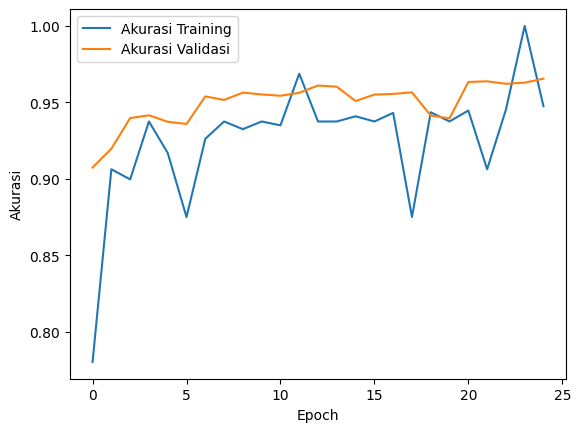

Saving 063584.jpg.jpg to 063584.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

File: 063584.jpg.jpg
Hasil Prediksi: [0.88193756]
Prediksi: Laki-laki (Male)


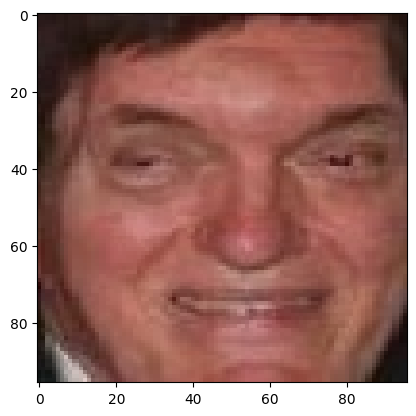

In [28]:
# Plot akurasi training & validasi
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

# --- Contoh untuk memprediksi gambar baru ---
from tensorflow.keras.preprocessing import image
import numpy as np

# Upload gambar wajah yang ingin Anda tes
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(96, 96))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(f"\nFile: {fn}")
  print(f"Hasil Prediksi: {classes[0]}")

  if classes[0] > 0.5:
    print("Prediksi: Laki-laki (Male)")
  else:
    print("Prediksi: Perempuan (Female)")